In [4]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


## Plot do Gráfico

In [5]:

# y(0) = 2


def phi(t,y,dt): #função de discretização
    k1 = f(t, y)
    k2 = f(t+dt/2, y + dt/2*k1)
    k3 = f(t+dt/2, y + dt/2*k2)
    k4 = f(t+dt, y + dt*k3)
    
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)     

def f(t, y): #função de Discretização
    
    f0 = 3*np.cos(3*t) - 2*np.sin(2*t) + 6*np.cos(6*t)          
    return f0

def Y(t0,T,n):
    t_n = np.linspace(t0,T,n)
    y_n = []
    for i in range(len(t_n)):
            
            y_n.append(np.cos(2*t_n[i]) + np.sin(3*t_n[i]) + np.sin(6*t_n[i])) 


    return y_n,np.array(t_n)

def approx(t0,T,y0,n):
    #C.I ------------
    t_n = np.linspace(t0,T,n)
    y_n = [y0] 
    dt = (T-t0)/n
    #----------------
    for i in range(1,len(t_n)):
        y_next = y_n[-1] +  dt*phi(t_n[i],y_n[-1],dt)
        y_n.append(y_next)
    return y_n,t_n   

def generate_dataframe(t_nN,y_nN,name):
    data = pd.DataFrame({
        't_n' : t_nN,
        'y_n' : y_nN,
        'name': name
    }
    )
    return data

def generate_dfs(t0,T,y0,x):
    dfs = []
    for i in range(6,x):
        y_n,t_n = approx(t0,T,y0,2**i) 
        dfs.append(generate_dataframe(t_n,y_n,f'approx 2^{i} == {2**i}'))
    return dfs


def plot_dfs(dfs):
    #sns.set_theme('whitegrid')
    colors = ['#440154','#482475','#414487','#355f8d','#2a788e','#21918c','#22a884','#44bf70','#7ad151','#bddf26']
    grossura_linha =  [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1, 1, 1, 1]
    estilos = [(2,2), (2,2), (2,2), (2,2), (2,2), (2,2), (1,0), (1,0), (1,0), (1,0)]

    for df,cor,width,estilo in zip(dfs,colors,grossura_linha,estilos):
        sns.lineplot(data=df, x='t_n',y='y_n',
                     hue = 'name',palette=[cor],
                     linewidth=width,
                     dashes=estilo
                     )
   
    #plt.xlim(0.6,0.65)
    #plt.ylim(0.7,0.73)

Text(0, 0.5, 'Y')

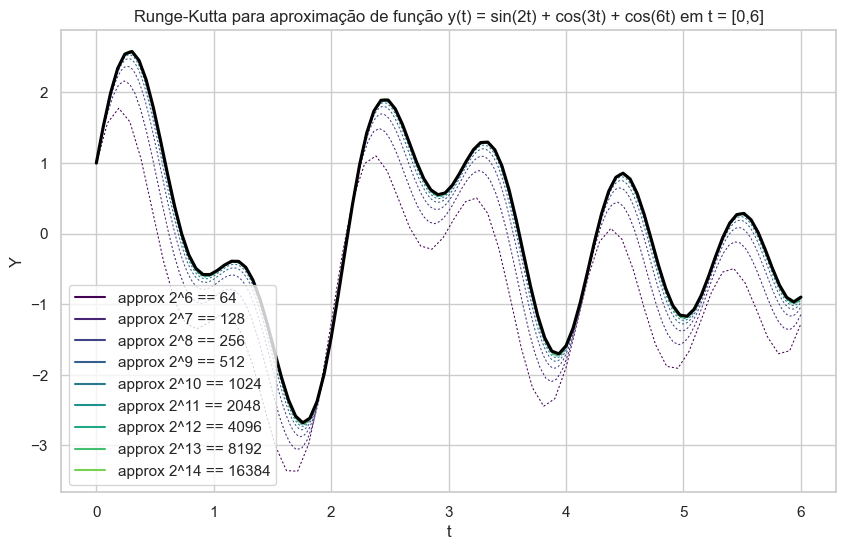

In [6]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))                      
y_n,t_n = Y(0,6,100)                          #(t0,T,n)
df_exato = generate_dataframe(t_n,y_n,'exato')

dfs = generate_dfs(0,6,1,15)                  #(t0,T,y0,NAO MEXER)
plot_dfs(dfs)
sns.lineplot(data=df_exato,x='t_n',y='y_n',color = 'black',linewidth=2.25)
plt.title('Runge-Kutta para aproximação de função y(t) = sin(2t) + cos(3t) + cos(6t) em t = [0,6]')
plt.xlabel('t')
plt.ylabel('Y')

In [7]:
df_aprox = dfs[0]

df_aprox.to_csv('manufat.csv')

## Cálculo do Erro Global

In [10]:
def erro_global(dfs,df_exato):
    e_g = []
    for df in dfs:
        e_g.append(df_exato['y_n'].iloc[-1] - df['y_n'].iloc[-1])
    return e_g

#dt/2
#dt/4
#dt/8
#...

def erro_q(e_g):
    Q = []
    for i in range(len(e_g)-1):
        Q.append(e_g[i] / e_g[i+1])
    Q.append(4)
    return Q

def gera_tabela(dfs,df_exato,t0,T):
    e_g = erro_global(dfs,df_exato)
    n = [2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14]
    q = erro_q(e_g)

    dt = []
    for i in range(len(n)):
        dt.append((T-t0)/n[i])


    log2 = [np.log(e_g[i] / e_g[i + 1]) / np.log(dt[i] / dt[i + 1]) for i in range(len(e_g) - 1)]
    log2.append('-')
    tabela_erro = pd.DataFrame({
        'n' : n,
        'erro global' : e_g,
        'q' : q,
        'log2' : log2,
        'dt' : dt
    })
    
    return tabela_erro

In [11]:
tabela = gera_tabela(dfs,df_exato,0,5)
tabela

,n,erro global,q,log2,dt
0,64,0.376706,1.522736,0.606666,0.078125
1,128,0.247387,1.802001,0.8496,0.039062
2,256,0.137285,1.910257,0.933767,0.019531
3,512,0.071867,1.957348,0.9689,0.009766
4,1024,0.036717,1.979218,0.984931,0.004883
5,2048,0.018551,1.989744,0.992583,0.002441
6,4096,0.009323,1.994905,0.99632,0.001221
7,8192,0.004674,1.997461,0.998167,0.000610
8,16384,0.002340,4.000000,-,0.000305


In [ ]:
def gera_tabela2(dfs):
    n = [2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14]
    u = []
    for i in range(len(dfs) - 2):
        u.append( (dfs[i]['y_n'].iloc[-1] - dfs[i+1]['y_n'].iloc[-1]) / (dfs[i+1]['y_n'].iloc[-1] - dfs[i+2]['y_n'].iloc[-1]))
    u.append('---')
    u.append('---')
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        'ordem' : u
    })
    return tabela_erro2

In [ ]:
tabela2 = gera_tabela2(dfs)
tabela2

NameError: name 'gera_tabela2' is not defined

# ORDEM P

dada por 2^p = ordem_da_tabela     --> 2^p ~ 2     --> p = 1


horrivel pra runge kutta mas nao sei o que ta acontecendo

In [50]:
# Reimportando as bibliotecas necessárias após o reset do ambiente de execução
import numpy as np

# Reimplementando o método RK4 para a equação dy/dt = y e calculando a ordem de convergência

def f_rk4(t, y):
    return np.cos(t) - 2*np.sin(2*t)

def rk4_step(t, y, dt):
    k1 = f_rk4(t, y)
    k2 = f_rk4(t + dt / 2, y + dt / 2 * k1)
    k3 = f_rk4(t + dt / 2, y + dt / 2 * k2)
    k4 = f_rk4(t + dt, y + dt * k3)
    return y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

def solve_rk4(T, n):
    y0 = 1
    t_n = np.linspace(0, T, n)
    dt = T / (n - 1)
    y_n = [y0]
    for i in range(1, len(t_n)):
        y_n.append(rk4_step(t_n[i-1], y_n[-1], dt))
    return y_n[-1]

# Calculando o erro global e a ordem de convergência
T = 7  # Intervalo de tempo final
erro_global_rk4 = []
dt_values = []
n_s = []
approxs = []
for i in range(4, 11):  # Testando para diferentes valores de n (2^i)
    n = 2**i
    n_s.append(n)
    dt_values.append(T / (n - 1))
    y_numerico = solve_rk4(T, n)
    y_exato = np.cos(2*T) + np.sin(T)
    erro_global_rk4.append(np.abs(y_exato - y_numerico))
    approxs.append(y_numerico)

# Calculando a ordem de convergência baseada nos erros globais
ordens_convergencia = [np.log(erro_global_rk4[i] / erro_global_rk4[i + 1]) / np.log(dt_values[i] / dt_values[i + 1]) for i in range(len(erro_global_rk4) - 1)]

dt_values, erro_global_rk4, ordens_convergencia
ordens_convergencia.append('-----')
tabela_erro = pd.DataFrame({
        'n' : n_s,
        'erro global' : erro_global_rk4,
        'ordem p' : ordens_convergencia,
        'dt' : dt_values
    })
tabela_erro

,n,erro global,ordem p,dt
0,16,2.226014e-04,4.028719,0.466667
1,32,1.195066e-05,4.006749,0.225806
2,64,6.972653e-07,4.001641,0.111111
3,128,4.217410e-08,4.000405,0.055118
4,256,2.594045e-09,4.000122,0.027451
5,512,1.608488e-10,4.000308,0.013699
6,1024,1.001166e-11,-----,0.006843


In [54]:
def gera_tabela2():
    n = [2**4,2**5,2**6,2**7,2**8,2**9,2**10]
    u = []
    for i in range(len(approxs) - 2):
        u.append( (approxs[i] - approxs[i+1]) / (approxs[i+1] - approxs[i+2]))
    u.append('---')
    u.append('---')
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        'ordem' : u
    })
    return tabela_erro2


In [55]:
tabela_2 = gera_tabela2()
tabela_2

,n,ordem
0,16,18.718856
1,32,17.178369
2,64,16.551045
3,128,16.266694
4,256,16.13128
5,512,---
6,1024,---


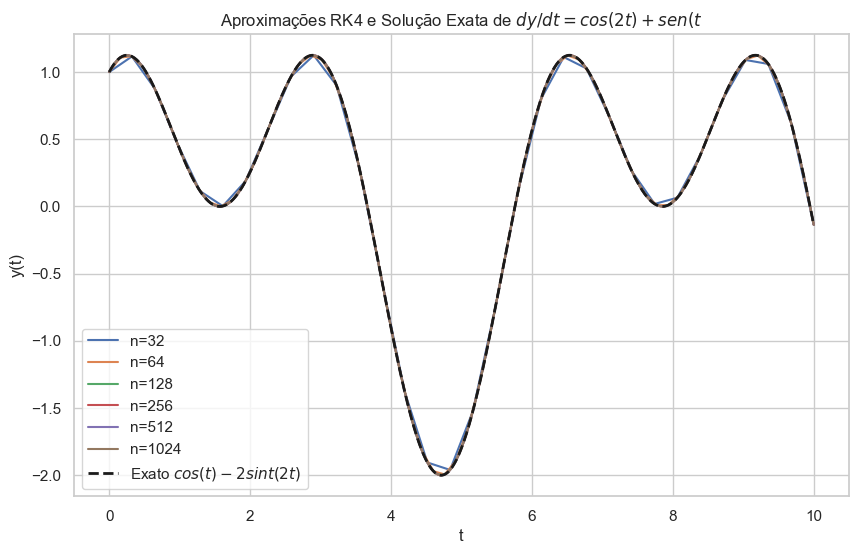

In [44]:
import matplotlib.pyplot as plt

# Definindo a função para resolver a EDO com RK4 para vários valores de n e armazenar os resultados
def solve_rk4_for_graph(T, n):
    y0 = 1
    t_n = np.linspace(0, T, n)
    dt = T / (n - 1)
    y_n = [y0]
    for i in range(1, len(t_n)):
        y_n.append(rk4_step(t_n[i-1], y_n[-1], dt))
    return t_n, y_n

# Solução exata
T = 10
t_exato = np.linspace(0, T, 1000)
y_exato = np.cos(2*t_exato) + np.sin(t_exato)

# Gerando soluções aproximadas para diferentes valores de n
ns = [2**i for i in range(5, 11)]
aproximacoes = [solve_rk4_for_graph(T, n) for n in ns]

# Plotando as soluções aproximadas e a solução exata
plt.figure(figsize=(10, 6))
for t_n, y_n in aproximacoes:
    plt.plot(t_n, y_n, label=f'n={len(t_n)}')
plt.plot(t_exato, y_exato, 'k--', label='Exato $cos(t) - 2sint(2t)$', linewidth=2)

plt.title('Aproximações RK4 e Solução Exata de $dy/dt = cos(2t) + sen(t$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()